In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/FL/regression/DATAvalidationwithoutFSandDSCFV - Copy.xlsx')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Flow arrangement      437 non-null    object 
 1   DS CFV                437 non-null    float64
 2   FS Temperature        437 non-null    int64  
 3   DS Temperature        437 non-null    int64  
 4   Experimental flux     437 non-null    float64
 5   Membrane orientation  437 non-null    object 
 6   FS type               437 non-null    object 
 7   FS Osmotic pressure   437 non-null    float64
 8   DS type               437 non-null    object 
 9   DS Molarity           437 non-null    float64
 10  DS Molecular weight   437 non-null    float64
 11  DS osmotic pressure   437 non-null    float64
 12  Membrane type         437 non-null    object 
 13  ∆∏                    437 non-null    float64
 14  A                     437 non-null    float64
 15  B                     4

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_flow = LabelEncoder()
le_F = LabelEncoder()
le_D = LabelEncoder()
le_M = LabelEncoder()

In [ ]:
le_flow.fit(data['Flow arrangement'].values)
le_F.fit(data['FS type'].values)
le_D.fit(data['DS type'].values)
le_M.fit(data['Membrane type'].values)

LabelEncoder()

In [ ]:
# data['Flow arrangement'] = le_flow.fit_transform(data['Flow arrangement'].values)
# data['FS type'] = le_F.fit_transform(data['FS type'].values)
# data['DS type'] = le_D.fit_transform(data['DS type'].values)
# data['Membrane type'] = le_M.fit_transform(data['Membrane type'].values)

In [ ]:
data['Flow arrangement'] = le_flow.transform(data['Flow arrangement'].values)
data['FS type'] = le_F.transform(data['FS type'].values)
data['DS type'] = le_D.transform(data['DS type'].values)
data['Membrane type'] = le_M.transform(data['Membrane type'].values)

In [ ]:
data_test_cicp['Flow arrangement'] = le_flow.transform(data_test_cicp['Flow arrangement'].values)
data_test_cicp['FS type'] = le_F.transform(data_test_cicp['FS type'].values)
data_test_cicp['DS type'] = le_D.transform(data_test_cicp['DS type'].values)
data_test_cicp['Membrane type'] = le_M.transform(data_test_cicp['Membrane type'].values)

In [ ]:
data_test_dicp['Flow arrangement'] = le_flow.transform(data_test_dicp['Flow arrangement'].values)
data_test_dicp['FS type'] = le_F.transform(data_test_dicp['FS type'].values)
data_test_dicp['DS type'] = le_D.transform(data_test_dicp['DS type'].values)
data_test_dicp['Membrane type'] = le_M.transform(data_test_dicp['Membrane type'].values)

In [ ]:
df_CICP_test = data_test_cicp.drop(columns=['CICP','Membrane orientation'], axis=1)
y_test_C_add = data_test_cicp['CICP']

In [ ]:
df_DICP_test = data_test_dicp.drop(columns=['DICP','Membrane orientation'], axis=1)
y_test_D_add = data_test_dicp['DICP']

In [ ]:
df_CICP_ori = data[data['Membrane orientation']=='AL-DS']
df_CICP_ori = df_CICP_ori.drop(columns=['DICP','Membrane orientation'], axis=1)
df_CICP = df_CICP_ori[df_CICP_ori['CICP']<160].reset_index(drop=True)

In [ ]:
df_DICP_ori = data[data['Membrane orientation']=='AL-FS']
df_DICP_ori = df_DICP_ori.drop(columns=['CICP','Membrane orientation'], axis=1)
df_DICP = df_DICP_ori[df_DICP_ori['DICP']<1].reset_index(drop=True)

In [ ]:
# df_CICP

In [ ]:
# df_DICP

In [ ]:
# #CICP
# fig, axs = plt.subplots(3,4, figsize = (10,5))
# plt1 = sns.boxplot(df_CICP['FS CFV'], ax = axs[0,0])
# plt2 = sns.boxplot(df_CICP['DS CFV'], ax = axs[0,1])
# plt3 = sns.boxplot(df_CICP['FS Temperature'], ax = axs[0,2])
# plt1 = sns.boxplot(df_CICP['DS Temperature'], ax = axs[0,3])
# plt2 = sns.boxplot(df_CICP['Experimental flux '], ax = axs[1,0])
# plt3 = sns.boxplot(df_CICP['FS Osmotic pressure'], ax = axs[1,1])
# plt1 = sns.boxplot(df_CICP['DS Molecular weight'], ax = axs[1,2])
# plt2 = sns.boxplot(df_CICP['DS osmotic pressure'], ax = axs[1,3])
# plt3 = sns.boxplot(df_CICP['∆∏'], ax = axs[2,0])

# plt.tight_layout()

In [ ]:
# #DICP
# fig, axs = plt.subplots(3,4, figsize = (10,5))
# plt1 = sns.boxplot(df_DICP['FS CFV'], ax = axs[0,0])
# plt2 = sns.boxplot(df_DICP['DS CFV'], ax = axs[0,1])
# plt3 = sns.boxplot(df_DICP['FS Temperature'], ax = axs[0,2])
# plt1 = sns.boxplot(df_DICP['DS Temperature'], ax = axs[0,3])
# plt2 = sns.boxplot(df_DICP['Experimental flux '], ax = axs[1,0])
# plt3 = sns.boxplot(df_DICP['FS Osmotic pressure'], ax = axs[1,1])
# plt1 = sns.boxplot(df_DICP['DS Molecular weight'], ax = axs[1,2])
# plt2 = sns.boxplot(df_DICP['DS osmotic pressure'], ax = axs[1,3])
# plt3 = sns.boxplot(df_DICP['∆∏'], ax = axs[2,0])

# plt.tight_layout()

In [ ]:
# sns.pairplot(df_CICP)
# plt.show()

In [ ]:
# sns.pairplot(df_DICP)
# plt.show()

In [ ]:
# plt.figure(figsize=(20, 12))
# plt.subplot(2,3,1)
# sns.boxplot(x = 'FS Temperature', y = 'CICP', data = df_CICP)
# plt.subplot(2,3,2)
# sns.boxplot(x = 'DS Temperature', y = 'CICP', data = df_CICP)
# plt.subplot(2,3,3)
# sns.boxplot(x = 'Experimental flux ', y = 'CICP', data = df_CICP)
# plt.subplot(2,3,4)
# sns.boxplot(x = 'FS Osmotic pressure', y = 'CICP', data = df_CICP)
# plt.subplot(2,3,5)
# sns.boxplot(x = 'DS Molecular weight', y = 'CICP', data = df_CICP)
# plt.subplot(2,3,6)
# sns.boxplot(x = '∆∏', y = 'CICP', data = df_CICP)
# plt.show()

In [ ]:
# plt.figure(figsize=(20, 12))
# plt.subplot(2,3,1)
# sns.boxplot(x = 'FS Temperature', y = 'DICP', data = df_DICP)
# plt.subplot(2,3,2)
# sns.boxplot(x = 'DS Temperature', y = 'DICP', data = df_DICP)
# plt.subplot(2,3,3)
# sns.boxplot(x = 'Experimental flux ', y = 'DICP', data = df_DICP)
# plt.subplot(2,3,4)
# sns.boxplot(x = 'FS Osmotic pressure', y = 'DICP', data = df_DICP)
# plt.subplot(2,3,5)
# sns.boxplot(x = 'DS Molecular weight', y = 'DICP', data = df_DICP)
# plt.subplot(2,3,6)
# sns.boxplot(x = '∆∏', y = 'DICP', data = df_DICP)
# plt.show()

In [ ]:
# df_CICP.describe()

In [ ]:
# df_DICP.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_cicp = StandardScaler()
scaler_dicp = StandardScaler()

In [ ]:
##df_CICP

In [ ]:
# num_vars = ['FS CFV', 'DS CFV', 'FS Temperature', 'DS Temperature', 'DS Molecular weight','DS osmotic pressure','∆∏']
# df_CICP[num_vars] = scaler.fit_transform(df_CICP[num_vars])

In [ ]:
num_vars = ['DS CFV', 'FS Temperature', 'DS Temperature', 'DS Molecular weight','DS osmotic pressure','∆∏']
scaler_cicp.fit(df_CICP[num_vars])
scaler_dicp.fit(df_DICP[num_vars])

StandardScaler()

In [ ]:
# num_vars = ['DS CFV', 'FS Temperature', 'DS Temperature', 'DS Molecular weight','DS osmotic pressure','∆∏']
# df_CICP[num_vars] = scaler.fit_transform(df_CICP[num_vars])

In [ ]:
df_CICP[num_vars] = scaler_cicp.transform(df_CICP[num_vars])

In [ ]:
df_DICP[num_vars] = scaler_dicp.transform(df_DICP[num_vars])

In [ ]:
df_CICP_test[num_vars] = scaler_cicp.transform(data_test_cicp[num_vars])
df_DICP_test[num_vars] = scaler_dicp.transform(data_test_dicp[num_vars])

In [ ]:
X_test_C_add = df_CICP_test
X_test_D_add = df_DICP_test

In [ ]:
# plt.figure(figsize = (16, 10))
# sns.heatmap(df_CICP.corr(), annot = True, cmap="YlGnBu")
# plt.show()

In [ ]:
# plt.figure(figsize = (16, 10))
# sns.heatmap(df_DICP.corr(), annot = True, cmap="YlGnBu")
# plt.show()

In [ ]:
X_C = df_CICP
y_C = df_CICP.pop('CICP')

In [ ]:
X_D = df_DICP
y_D = df_DICP.pop('DICP')

In [ ]:
X_train_C, X_val_C, y_train_C, y_val_C = train_test_split(X_C, y_C, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=150)

X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_train_C, y_train_C, 
                                                    train_size=0.9,
                                                    test_size = 0.1, random_state=150)

In [ ]:
X_train_D, X_val_D, y_train_D, y_val_D = train_test_split(X_D, y_D, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=150)

X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(X_train_D, y_train_D, 
                                                    train_size=0.9,
                                                    test_size = 0.1,random_state=10)

In [ ]:
train_C = pd.concat([X_train_C, y_train_C], axis=1)
train_D = pd.concat([X_train_D, y_train_D], axis=1)
val_C = pd.concat([X_val_C, y_val_C], axis=1)
val_D = pd.concat([X_val_D, y_val_D], axis=1)

In [ ]:
# train_C.to_excel('train_CICP.xlsx',index=False)
# val_C.to_excel('val_CICP.xlsx',index=False)
# train_D.to_excel('train_DICP.xlsx',index=False)
# val_D.to_excel('val_DICP.xlsx',index=False)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model_regression_D = LinearRegression(fit_intercept=False)
model_regression_D.fit(X_train_D, y_train_D)
print('R2 score of Linear Regression for val DICP is: ',model_regression_D.score(X_val_D, y_val_D))
print('R2 score of Linear Regression for test DICP is: ',model_regression_D.score(X_test_D, y_test_D))

R2 score of Linear Regression for val DICP is:  0.5272500873538821
R2 score of Linear Regression for test DICP is:  0.4805362515785252


In [ ]:
from xgboost import XGBRegressor
model_xgb_C = XGBRegressor(objective="reg:squarederror", random_state=12)
model_xgb_C.fit(X_train_C, y_train_C)
print('R2 score of XGBoost for val CICP is: ',model_xgb_C.score(X_train_C, y_train_C))
print('R2 score of XGBoost for val CICP is: ',model_xgb_C.score(X_val_C, y_val_C))
print('R2 score of XGBoost for test CICP is: ',model_xgb_C.score(X_test_C, y_test_C))

R2 score of XGBoost for val CICP is:  0.999723426401725
R2 score of XGBoost for val CICP is:  0.900034903565031
R2 score of XGBoost for test CICP is:  0.8807417755047211


In [ ]:
from xgboost import XGBRegressor
model_xgb_D = XGBRegressor(objective="reg:squarederror", random_state=10)
model_xgb_D.fit(X_train_D, y_train_D)
print('R2 score of XGBoost for DICP train is: ',model_xgb_D.score(X_train_D, y_train_D))
print('R2 score of XGBoost for val DICP is: ',model_xgb_D.score(X_val_D, y_val_D))
print('R2 score of XGBoost for test DICP is: ',model_xgb_D.score(X_test_D, y_test_D))

R2 score of XGBoost for DICP train is:  0.9493011201884215
R2 score of XGBoost for val DICP is:  0.9277869840858413
R2 score of XGBoost for test DICP is:  0.8112925167042577


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_C_xgb=model_xgb_C.predict(X_test_C)
y_pred_D_xgb=model_xgb_D.predict(X_test_D)


In [ ]:
y_pred_test_C_xgb=model_xgb_C.predict(X_test_C)
y_pred_test_D_xgb=model_xgb_D.predict(X_test_D)
MSE_xgboost_C = mean_squared_error(y_test_C, y_pred_C_xgb, squared=False)
MSE_xgboost_D = mean_squared_error(y_test_D, y_pred_D_xgb, squared=False)
print("MSE of xgboost test CICP: ", MSE_xgboost_C)
print("MSE of xgboost test DICP: ", MSE_xgboost_D)

MSE of xgboost test CICP:  13.327348315454628
MSE of xgboost test DICP:  0.07712956824335851


In [ ]:
cicp_feature_xgb = pd.DataFrame({'feature_name':X_train_C.columns, 'feature_value':model_xgb_C.feature_importances_})
dicp_feature_xgb = pd.DataFrame({'feature_name':X_train_D.columns, 'feature_value':model_xgb_D.feature_importances_})

In [ ]:
# cicp_feature_xgb.to_excel('/content/CICP_feature_importance.xlsx', index=False)
# dicp_feature_xgb.to_excel('/content/DICP_feature_importance.xlsx', index=False)

In [ ]:
# import matplotlib.pyplot as plt
# import xgboost as xgb
# xgb.plot_importance(model_xgb_D)
# fig = plt.figure()
# plt.rcParams['figure.figsize'] = [5, 5]
# plt.show()
# # fig.savefig('CICP.png', format='png', dpi=400)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_randomForest_C=RandomForestRegressor(n_estimators=100)
model_randomForest_C.fit(X_train_C, y_train_C)
print('R2 score of Random Forest for train CICP is: ',model_randomForest_C.score(X_train_C, y_train_C))
print('R2 score of Random Forest for val CICP is: ',model_randomForest_C.score(X_val_C, y_val_C))
print('R2 score of Random Forest for test CICP is: ',model_randomForest_C.score(X_test_C, y_test_C))

R2 score of Random Forest for train CICP is:  0.9877673125030896
R2 score of Random Forest for val CICP is:  0.8217489434669613
R2 score of Random Forest for test CICP is:  0.9001656972250901


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_randomForest_D=RandomForestRegressor(n_estimators=100)
model_randomForest_D.fit(X_train_D, y_train_D)
print('R2 score of Random Forest for train DICP is: ',model_randomForest_D.score(X_train_D, y_train_D))
print('R2 score of Random Forest for val DICP is: ',model_randomForest_D.score(X_val_D, y_val_D))
print('R2 score of Random Forest for test DICP is: ',model_randomForest_D.score(X_test_D, y_test_D))

R2 score of Random Forest for train DICP is:  0.9567466142958924
R2 score of Random Forest for val DICP is:  0.866169007805641
R2 score of Random Forest for test DICP is:  0.7928027623836184


In [ ]:
y_pred_C_forest=model_randomForest_C.predict(X_val_C)
y_pred_D_forest=model_randomForest_D.predict(X_val_D)
y_pred_test_C_forest=model_randomForest_C.predict(X_test_C)
y_pred_test_D_forest=model_randomForest_D.predict(X_test_D)
MSE_forest_test_C = mean_squared_error(y_test_C, y_pred_test_C_forest, squared=False)
MSE_forest_test_D = mean_squared_error(y_test_D, y_pred_test_D_forest, squared=False)

print("MSE of forest test CICP: ", MSE_forest_test_C)
print("MSE of forest test DICP: ", MSE_forest_test_D)

MSE of forest test CICP:  12.193811392132766
MSE of forest test DICP:  0.08081990199122327


In [ ]:
## CATBOOST 

In [ ]:
from catboost import CatBoostRegressor
model_cat_C = CatBoostRegressor(random_state=2021,n_estimators=100,depth=7, verbose=0)
model_cat_C.fit(X_train_C, y_train_C)
print('R2 score of CatBoost for CICP train is: ',model_cat_C.score(X_train_C, y_train_C))
print('R2 score of CatBoost for CICP val is: ',model_cat_C.score(X_val_C, y_val_C))
print('R2 score of CatBoost for CICP test is: ',model_cat_C.score(X_test_C, y_test_C))
print('R2 score of CatBoost for CICP add test is: ',model_cat_C.score(X_test_C_add, y_test_C_add))

R2 score of CatBoost for CICP train is:  0.999775927229197
R2 score of CatBoost for CICP val is:  0.8259201484073156
R2 score of CatBoost for CICP test is:  0.991220445925589
R2 score of CatBoost for CICP add test is:  -21.309596531751072


In [ ]:
X_test_C

Flow arrangement    DS CFV  ...             A             B
81                 1  0.126352  ...  1.000000e-07  5.000000e-08
36                 1 -0.836919  ...  2.040000e-07  6.540000e-08
45                 0  1.500931  ...  2.040000e-07  9.800000e-07
46                 0  1.500931  ...  2.040000e-07  9.800000e-07
59                 0  1.500931  ...  2.040000e-07  9.800000e-07
71                 0 -0.486348  ...  2.800000e-07  1.200000e-07
3                  1 -0.836919  ...  2.040000e-07  6.540000e-08

[7 rows x 15 columns]

In [ ]:
X_test_C_add # test added have more same values

Flow arrangement    DS CFV  ...             A             B
0                 0 -0.914812  ...  2.040000e-07  9.800000e-07
1                 0 -0.914812  ...  2.040000e-07  9.800000e-07
2                 0 -0.914812  ...  2.040000e-07  9.800000e-07
3                 0 -0.914812  ...  2.040000e-07  9.800000e-07

[4 rows x 15 columns]

In [ ]:
from catboost import CatBoostRegressor

model_cat_D = CatBoostRegressor(n_estimators=100,verbose=0)
model_cat_D.fit(X_train_D, y_train_D)

print('R2 score of CatBoost for DICP val is: ',model_cat_D.score(X_val_D, y_val_D))
print('R2 score of CatBoost for DICP train is: ',model_cat_D.score(X_train_D, y_train_D))
print('R2 score of CatBoost for DICP test is: ',model_cat_D.score(X_test_D, y_test_D))
print('R2 score of CatBoost for DICP add test is: ',model_cat_D.score(X_test_D_add, y_test_D_add))


R2 score of CatBoost for DICP val is:  0.9558067478767348
R2 score of CatBoost for DICP train is:  0.9923434241643654
R2 score of CatBoost for DICP test is:  0.9218606634823839
R2 score of CatBoost for DICP add test is:  0.41045786472700896


In [ ]:
y_pred_test_D_cat=model_cat_D.predict(X_test_D)
y_pred_test_C_cat=model_cat_C.predict(X_test_C)

In [ ]:
MSE_catboost_test_C = mean_squared_error(y_test_C, y_pred_test_C_cat, squared=False)
MSE_catboost_test_D = mean_squared_error(y_test_D, y_pred_test_D_cat, squared=False)
print("MSE of catboost test CICP: ", MSE_catboost_test_C)
print("MSE of catboost test DICP: ", MSE_catboost_test_D)

MSE of catboost test CICP:  3.616061496499477
MSE of catboost test DICP:  0.04963193399615643


Text(0.5, 0, 'CatBoost Feature Importance DICP on Training Data')

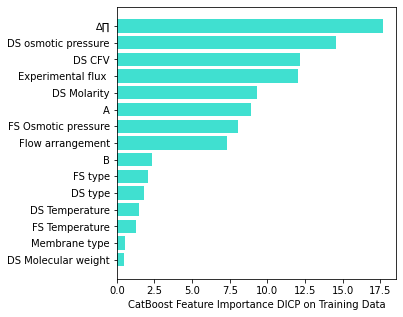

In [ ]:
sorted_feature_importance = model_cat_D.feature_importances_.argsort()
plt.barh(X_train_D.columns[sorted_feature_importance], 
model_cat_D.feature_importances_[sorted_feature_importance], 
color='turquoise')
plt.xlabel("CatBoost Feature Importance DICP on Training Data")

Text(0.5, 0, 'CatBoost Feature Importance DICP on Test Data')

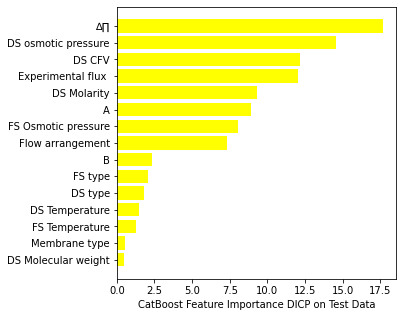

In [ ]:
sorted_feature_importance = model_cat_D.feature_importances_.argsort()
plt.barh(X_test_D.columns[sorted_feature_importance], 
model_cat_D.feature_importances_[sorted_feature_importance], 
color='yellow')
plt.xlabel("CatBoost Feature Importance DICP on Test Data")

Text(0.5, 0, 'CatBoost Feature Importance CICP on Training Data')

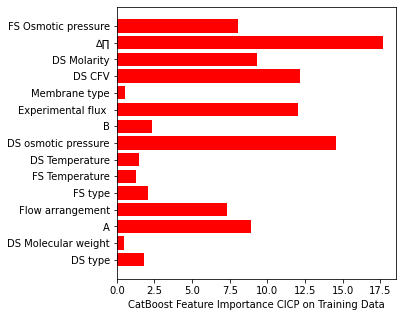

In [ ]:
sorted_feature_importance = model_cat_C.feature_importances_.argsort()
plt.barh(X_train_C.columns[sorted_feature_importance], 
model_cat_D.feature_importances_[sorted_feature_importance], 
color='red')
plt.xlabel("CatBoost Feature Importance CICP on Training Data")

Text(0.5, 0, 'CatBoost Feature Importance CICP on Test Data')

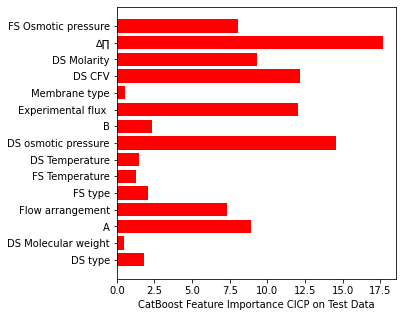

In [ ]:
sorted_feature_importance = model_cat_C.feature_importances_.argsort()
plt.barh(X_test_C.columns[sorted_feature_importance], 
model_cat_D.feature_importances_[sorted_feature_importance], 
color='red')
plt.xlabel("CatBoost Feature Importance CICP on Test Data")

In [ ]:
 import catboost
 cicp_feature_cat = model_cat_C.get_feature_importance(type=catboost.EFstrType.FeatureImportance, prettified=True, thread_count=-1, verbose=False)
 dicp_feature_cat = model_cat_D.get_feature_importance(type=catboost.EFstrType.FeatureImportance, prettified=True, thread_count=-1, verbose=False)
 cicp_feature_cat.to_excel('/content/CICP_catboost_feature.xlsx', index=False)
 dicp_feature_cat.to_excel('/content/DICP_catboost_feature.xlsx', index=False)

In [ ]:
from catboost import CatBoostRegressor, Pool, EShapCalcType, EFeaturesSelectionAlgorithm

model_cat_D = CatBoostRegressor()
model_cat_D.fit(X_train_D, y_train_D,verbose=False, plot=True)

feature_names_D = df_DICP.columns.to_list()
train_pool_D = Pool(X_train_D, y_train_D, feature_names=feature_names_D)
val_pool_D = Pool(X_val_D, y_val_D, feature_names=feature_names_D)
summary_D = model_cat_D.select_features(
    train_pool_D,
    eval_set=val_pool_D,
    features_for_select='0-14',
    num_features_to_select= 4,
    steps=5,
    algorithm=EFeaturesSelectionAlgorithm.RecursiveByShapValues,
    shap_calc_type=EShapCalcType.Regular,
    train_final_model=False,
    logging_level='Silent',
    plot=True
)
print('R2 score of CatBoost for val DICP is: ',model_cat_D.score(X_val_D, y_val_D))
print('R2 score of CatBoost for test DICP is: ',model_cat_D.score(X_test_D, y_test_D))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

R2 score of CatBoost for val DICP is:  0.9630640877876167
R2 score of CatBoost for test DICP is:  0.9213138427518649


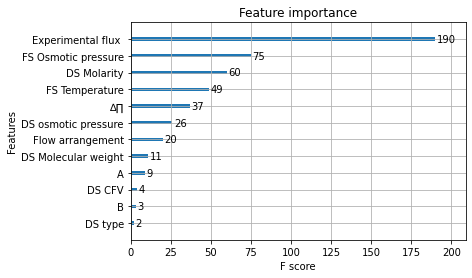

<Figure size 432x288 with 0 Axes>

In [ ]:
##import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_importance(model_xgb_C)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()
fig.savefig('CICP.png', format='png', dpi=400)

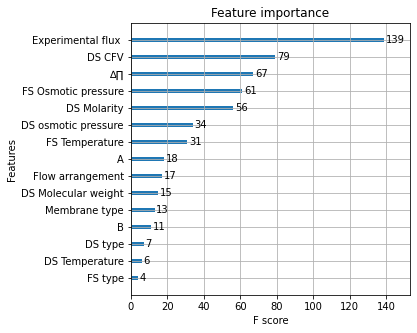

<Figure size 360x360 with 0 Axes>

In [ ]:
##import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_importance(model_xgb_D)
fig = plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()
fig.savefig('DICP.png', format='png', dpi=400)

In [ ]:
# model_xgb_C.save_model("cat_boost_C")
# model_xgb_D.save_model("cat_boost_D")
# from_file.load_model("model")

In [ ]:
##y_pred_C_xgb=model_xgb_C.predict(X_val_C)
y_pred_D_cat=model_cat_D.predict(X_val_D)
y_pred_C_cat=model_cat_C.predict(X_val_C)
y_pred_D_xgb=model_xgb_D.predict(X_val_D)

In [ ]:

##y_pred_C_forest=model_randomForest_C.predict(X_val_C)
y_pred_D_forest=model_randomForest_D.predict(X_val_D)

In [ ]:
##y_pred_test_C_xgb=model_xgb_C.predict(X_test_C)
y_pred_test_D_cat=model_cat_D.predict(X_test_D)
y_pred_test_C_cat=model_cat_C.predict(X_test_C)
y_pred_test_D_xgb=model_xgb_D.predict(X_test_D)

In [ ]:
y_pred_test_D_add_cat=model_cat_D.predict(X_test_D_add)
y_pred_test_C_add_cat=model_cat_C.predict(X_test_C_add)

In [ ]:
DICP_pred_add_cat_dataframe=pd.DataFrame({'DICP_predict':y_pred_test_D_add_cat})
CICP_pred_add_cat_dataframe=pd.DataFrame({'CICP_predict':y_pred_test_C_add_cat})

In [ ]:
y_test_C_add = y_test_C_add.reset_index(drop=True)
y_test_D_add = y_test_C_add.reset_index(drop=True)

In [ ]:
result_CICP_cat_add = pd.concat([y_test_C_add, CICP_pred_add_cat_dataframe], axis=1)
result_DICP_cat_add = pd.concat([y_test_D_add, DICP_pred_add_cat_dataframe], axis=1)

In [ ]:
###result_CICP_cat_add.to_excel('/content/CICP_predict_cat_add.xlsx', index=False)
######result_DICP_cat_add.to_excel('/content/DICP_predict_cat_add.xlsx', index=False)

In [ ]:

##

In [ ]:
##from sklearn.metrics import mean_squared_error

##MSE_forest_C = mean_squared_error(y_val_C, y_pred_C_forest, squared=False)
MSE_forest_D = mean_squared_error(y_val_D, y_pred_D_forest, squared=False)
MSE_xgboost_C = mean_squared_error(y_val_C, y_pred_C_xgb, squared=False)
MSE_xgboost_D = mean_squared_error(y_val_D, y_pred_D_xgb, squared=False)
MSE_catboost_C = mean_squared_error(y_val_C, y_pred_C_cat, squared=False)
MSE_catboost_D = mean_squared_error(y_val_D, y_pred_D_cat, squared=False)


# print("MSE of forest val CICP: ", MSE_forest_C)
print("MSE of forest val CICP: ", MSE_forest_D)
print("MSE of xgboost val CICP: ", MSE_xgboost_C)
print("MSE of xgboost val DICP: ", MSE_xgboost_D)
print("MSE of catboost val CICP: ", MSE_catboost_C)
print("MSE of catboost val CICP: ", MSE_catboost_D)

NameError: ignored

In [ ]:
#from sklearn.metrics import mean_squared_error

MSE_forest_test_C = mean_squared_error(y_test_C, y_pred_test_C_forest, squared=False)
MSE_forest_test_D = mean_squared_error(y_test_D, y_pred_test_D_forest, squared=False)
MSE_xgboost_test_C = mean_squared_error(y_test_C, y_pred_test_C_xgb, squared=False)
MSE_xgboost_test_D = mean_squared_error(y_test_D, y_pred_test_D_xgb, squared=False)
MSE_catboost_test_C = mean_squared_error(y_test_C, y_pred_test_C_cat, squared=False)
MSE_catboost_test_D = mean_squared_error(y_test_D, y_pred_test_D_cat, squared=False)


print("MSE of forest test CICP: ", MSE_forest_test_C)
print("MSE of forest test DICP: ", MSE_forest_test_D)
print("MSE of xgboost test CICP: ", MSE_xgboost_test_C)
print("MSE of xgboost test DICP: ", MSE_xgboost_test_D)
print("MSE of catboost test CICP: ", MSE_catboost_test_C)
print("MSE of catboost test DICP: ", MSE_catboost_test_D)

In [ ]:
# # model_cat_D.plot_tree(tree_idx=0)
# import catboost
# cicp_feature_cat = model_cat_C.get_feature_importance(type=catboost.EFstrType.FeatureImportance, prettified=True, thread_count=-1, verbose=False)
# dicp_feature_cat = model_cat_D.get_feature_importance(type=catboost.EFstrType.FeatureImportance, prettified=True, thread_count=-1, verbose=False)
# cicp_feature_cat.to_excel('/content/CICP_catboost_feature.xlsx', index=False)
# dicp_feature_cat.to_excel('/content/DICP_catboost_feature.xlsx', index=False)

In [ ]:
# fig.clear() 
# fig = plt.figure()
# plt.scatter(y_val_C,y_pred_C)
# point1 = [min(y_val_C), min(y_pred_C)]
# point2 = [max(y_val_C), max(y_pred_C)]
# x_values = [point1[0], point2[0]]
# y_values = [point1[1], point2[1]]
# plt.plot(x_values, y_values, 'm', label='fit line CICP')
# fig.suptitle('y_val CICP vs y_pred CICP', fontsize=20)             
# plt.xlabel('y_val CICP', fontsize=18)                          
# plt.ylabel('y_pred CICP', fontsize=16) 
# plt.legend()

In [ ]:
# fig.clear() 
# fig = plt.figure()
# plt.scatter(y_val_D,y_pred_D)
# point1 = [min(y_val_D), min(y_pred_D)]
# point2 = [max(y_val_D), max(y_pred_D)]
# x_values = [point1[0], point2[0]]
# y_values = [point1[1], point2[1]]
# plt.plot(x_values, y_values, 'm', label='fit line DICP')
# fig.suptitle('y_val DICP vs y_pred DICP', fontsize=20)             
# plt.xlabel('y_val DICP', fontsize=18)                          
# plt.ylabel('y_pred DICP', fontsize=16) 
# plt.legend()

In [ ]:
# # Plot the histogram of the error terms
# fig = plt.figure()
# sns.distplot((y_val_C - y_pred_C), bins = 20)
# fig.suptitle('Error Terms CICP', fontsize = 20)                 
# plt.xlabel('Errors', fontsize = 18) 

In [ ]:
# # Plot the histogram of the error terms
# fig = plt.figure()
# sns.distplot((y_val_D - y_pred_D), bins = 20)
# fig.suptitle('Error Terms DICP', fontsize = 20)                  # Plot heading 
# plt.xlabel('Errors', fontsize = 18) 

In [ ]:
# plt.scatter(y_val_C,(y_val_C - y_pred_C))
# plt.show()

In [ ]:
# plt.scatter(y_val_D,(y_val_D - y_pred_D))
# plt.show()

In [ ]:
#CICP_pred_dataframe=pd.DataFrame({'CICP_predict':y_pred_C})
DICP_pred_dataframe=pd.DataFrame({'DICP_predict':y_pred_D})

In [ ]:
#CICP_pred_linear_dataframe=pd.DataFrame({'CICP_predict':y_pred_C_linear})
DICP_pred_linear_dataframe=pd.DataFrame({'DICP_predict':y_pred_D_linear})
CICP_pred_forest_dataframe=pd.DataFrame({'CICP_predict':y_pred_C_forest})
DICP_pred_forest_dataframe=pd.DataFrame({'DICP_predict':y_pred_D_forest})

# y_pred_C_linear=model_regression_C.predict(X_val_C)
# y_pred_D_linear=model_regression_D.predict(X_val_D)
# y_pred_C_forest=model_randomForest_C.predict(X_val_C)
# y_pred_D_forest=model_randomForest_D.predict(X_val_D)

In [ ]:
#DICP_pred_dataframe

In [ ]:
#y_val_C = y_val_C.reset_index(drop=True)
y_val_D = y_val_D.reset_index(drop=True)

In [ ]:
#result_CICP_linear = pd.concat([y_val_C, CICP_pred_linear_dataframe], axis=1)
result_DICP_linear = pd.concat([y_val_D, DICP_pred_linear_dataframe], axis=1)
result_CICP_forest = pd.concat([y_val_C, CICP_pred_forest_dataframe], axis=1)
result_DICP_forest = pd.concat([y_val_D, DICP_pred_forest_dataframe], axis=1)

In [ ]:
#result_CICP_linear.to_excel('/content/CICP_predict_linear.xlsx', index=False)
result_DICP_linear.to_excel('/content/DICP_predict_linear.xlsx', index=False)
result_CICP_forest.to_excel('/content/CICP_predict_forest.xlsx', index=False)
result_DICP_forest.to_excel('/content/DICP_predict_forest.xlsx', index=False)

In [ ]:
#result_CICP = pd.concat([y_val_C, CICP_pred_dataframe], axis=1)
result_CICP

In [ ]:
#result_DICP = pd.concat([y_val_D, DICP_pred_dataframe], axis=1)
result_DICP

In [ ]:
#result_CICP.to_excel('/content/CICP_catboost.xlsx', index=False)

In [ ]:
#result_DICP.to_excel('/content/DICP.xlsx', index=False)